<a href="https://www.kaggle.com/code/kalilurrahman/store-sales-eda-prediction-with-ts?scriptVersionId=153441697" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
!wget http://bit.ly/3ZLyF82 -O CSS.css -q
    
from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)

In [3]:
%matplotlib inline
from IPython.core.display import display, HTML, Javascript

html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
        <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Verdana">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open Sans">
        <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
        <style>
        .title-section{
            font-family: "Roboto", Verdana, sans-serif;
            font-weight: bold;
            color: "#6A8CAF";
            letter-spacing: 6px;
        }
        hr { border: 1px solid #E58F65 !important;
             color: #E58F65 !important;
             background: #E58F65 !important;
           }
        body {
            font-family: "Verdana", sans-serif;
            }        
        </style>
    </head>    
</html>
"""

HTML(html_contents)


<a id="timeseriestools"></a>
<h1 style='background:#B2FF33; border:0;'><center>Time Series Intro</center></h1>

### Intro
###### Source: Wikipedia

In mathematics, a time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. Examples of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average.

A Time series is very frequently plotted via a run chart (which is a temporal line chart). Time series are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, earthquake prediction, electroencephalography, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements.

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values. While regression analysis is often employed in such a way as to test relationships between one or more different time series, this type of analysis is not usually called "time series analysis", which refers in particular to relationships between different points in time within a single series. Interrupted time series analysis is used to detect changes in the evolution of a time series from before to after some intervention which may affect the underlying variable.

![Exampl2-1](https://upload.wikimedia.org/wikipedia/commons/7/77/Random-data-plus-trend-r2.png)| ![Example-2](https://upload.wikimedia.org/wikipedia/commons/0/05/Tuberculosis_incidence_US_1953-2009.png) | 


### Tools

Tools for investigating time-series data include:

- Consideration of the *autocorrelation|autocorrelation function-and the *Spectral density|spectral density function-(also *cross-correlation function*s and cross-spectral density functions)
- *Scaled correlation|Scaled-cross- and auto-correlation functions to remove contributions of slow components
- Performing a *Fourier transform-to investigate the series in the *frequency domain*
- Use of a *digital filter|filter-to remove unwanted *noise (physics)|noise*
- *Principal component analysis-(or *empirical orthogonal function-analysis)
- *Singular spectrum analysis*
- "Structural" models:
- General *State Space Model*s
- Unobserved Components Models
- *Machine Learning*
> - *Artificial neural network*s
> - *Support vector machine*
> - *Fuzzy logic*
> - *Gaussian process*
> - *Hidden Markov model*
- *Queueing theory-analysis
- *Control chart*
> - *Shewhart individuals control chart*
> - *CUSUM-chart
> - *EWMA chart*
- *Detrended fluctuation analysis*
- *Nonlinear mixed-effects model|Nonlinear mixed-effects modeling*
- *Dynamic time warping*
- *Cross-correlation*
- *Dynamic Bayesian network*
- *Time-frequency representation|Time-frequency analysis techniques:*
> - *Fast Fourier transform*
> - *Continuous wavelet transform*
> - *Short-time Fourier transform*
> - *Chirplet transform*
> - *Fractional Fourier transform*
- *Chaos theory|Chaotic analysis*
> - *Correlation dimension*
> - *Recurrence plot*s
> - *Recurrence quantification analysis*
> - *Lyapunov exponent*s
> - *Entropy encoding*


<a id="timeseriestools"></a>
<h1 style='background:#B2FF33; border:0;'><center>Time Series Tools</center></h1>

### I evaluated the following Time Series Python Libraries for this exercise. Some of them had issues in a Kaggle Environment

| Library   | Description | 
| -------- | ---------- | 
|<a href='https://facebook.github.io/prophet/'><img src="https://miro.medium.com/max/546/1*pdXzwREgeCV0Mh1hONNzpw.png" width="300" height="200"></a>|  Prophet is an excellent library developed by Facebook’s data science team - [Link](https://facebook.github.io/prophet/)     |
|<a href='https://github.com/uber/orbit'><img src="https://raw.githubusercontent.com/uber/orbit/dev/docs/img/orbit-banner.png" width="300" height="200"></a>| Orbit is a Python framework created by Uber for Bayesian time series forecasting and inference - [Link](https://github.com/uber/orbit)     |
|<a href='https://github.com/unit8co/darts'><img src="https://miro.medium.com/max/1314/1*ZJf8iWBoBAFYESK7plslgQ.png" width="300" height="200"></a>| Darts is a scikit-learn friendly Python package for forecasting time series - [Link](https://github.com/unit8co/darts)     |
|<a href='https://github.com/blue-yonder/tsfresh '><img src="https://miro.medium.com/max/966/1*O3uPA0cvopTm5X5fgAgczA.png" width="300" height="200"></a>|tsfresh is a friendly Python package for forecasting time series - [Link](https://github.com/blue-yonder/tsfresh )     |
|<a href='https://github.com/winedarksea/AutoTS'><img src="https://miro.medium.com/max/790/1*YKC9uODo3wUJQXx0Ll1Zsw.png" width="300" height="200"></a>|As the name suggests it is a Python library for automated time series analysis. - [Link](https://github.com/winedarksea/AutoTS )     |
|<a href='https://hcrystalball.readthedocs.io/en/latest/'><img src="https://raw.githubusercontent.com/heidelbergcement/hcrystalball/master/docs/_static/hcrystal_ball_logo_black.svg" width="300" height="200"></a>|H CrystalBall is A library that unifies the API for most commonly used libraries and modelling techniques for time-series forecasting in the Python ecosystem. - [Link](https://hcrystalball.readthedocs.io/en/latest/)  |
|<a href='https://www.statsmodels.org/stable/tsa.html?highlight=tsa#module-statsmodels.tsa'><img src="https://www.statsmodels.org/stable/_images/statsmodels-logo-v2-horizontal.svg" width="300" height="200"></a>|statsmodels.tsa contains model classes and functions that are useful for time series analysis. Basic models include univariate autoregressive models (AR), vector autoregressive models (VAR) and univariate autoregressive moving average models (ARMA). - [Link](https://www.statsmodels.org/stable/tsa.html?highlight=tsa#module-statsmodels.tsa)  |
|<a href='https://pyflux.readthedocs.io/en/latest/'><img src="https://techleerimages.s3.ap-south-1.amazonaws.com/2047.png" width="300" height="200"></a>|Pyflux is an open-source time-series library built for python.PyFlux is a library for time series analysis and prediction. Users can choose from a flexible range of modelling and inference options, and use the output for forecasting and retrospection. - [Link](https://pyflux.readthedocs.io/en/latest/)  |
|<a href='https://github.com/alteryx/featuretools'><img src="https://camo.githubusercontent.com/b76fee14056cf14312d32dd362cacf3d313a38dc9e21c1f614735d3cbe5d5ce2/68747470733a2f2f7777772e66656174757265746f6f6c732e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031372f31322f466561747572654c6162732d4c6f676f2d54616e676572696e652d3830302e706e67" width="300" height="200"></a>|Featuretools is a python library for automated feature engineering. See the documentation for more information. - [Link](https://github.com/alteryx/featuretools)  |
|<a href='https://github.com/arrow-py/arrow'><img src="https://arrow.apache.org/docs/_static/arrow.png" width="300" height="200"></a>|Arrow is a Python library that offers a sensible and human-friendly approach to creating, manipulating, formatting and converting dates, times and timestamps - [Link](https://github.com/arrow-py/arrow)  |
|<a href='https://github.com/cesium-ml/cesium'><img src="https://cesium-ml.org/blog/theme/img/cesium-blue-light.png" width="300" height="200"></a>|cesium: Open-Source Platform for Time Series Inference.Cesium is an open source library that allows users to extract features from raw time series data, build machine learning models from these features, as well as generate predictions for new data. - [Link] (https://github.com/cesium-ml/cesium)  |
|<a href='https://github.com/TimeSynth/TimeSynth'>TimeSynth</a>|TimeSynth is an open source library for generating synthetic time series for model testing. The library can generate regular and irregular time series.  - [Link](https://github.com/TimeSynth/TimeSynth)  |




<a id="table-of-contents"></a>
<h1 style='background:#B2FF33; border:0;'><center>Table of Contents</center></h1>

## [1. Introduction](#1)
### [1.1 Loading of Libraries](#1.1)
### [1.2 Data Loading](#1.2)
## [2. Data Exploration](#2)
### [2.1 Number of Rows and columns](#2.1)
## [3. Features Analysis](#3)
## [4. Use of Prophet for TimeSeries](#4)
## [Work In Progress](#999)

[back to top](#table-of-contents)
<a id="1"></a>
# 1. Introduction
Introduction of the problem, loading of libraries and data 

[back to top](#table-of-contents)
<a id="1.1"></a>

## 1.1 Loading of Libraries
### Load all the libraries to be used

In [4]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
from fbprophet import Prophet



[back to top](#table-of-contents)
<a id="1.2"></a>
## 1.2 Loading of Datasets
### Let us load the datasets

In [5]:
path = '/kaggle/input/store-sales-time-series-forecasting/'
oil_data = pd.read_csv(path+'oil.csv')
train = pd.read_csv(path+'train.csv', parse_dates = True, low_memory = False, index_col = 'date')
test = pd.read_csv(path+'test.csv')
submission_sample = pd.read_csv(path+'sample_submission.csv')
holidays_data = pd.read_csv(path+'holidays_events.csv')
store_data =  pd.read_csv(path+'stores.csv')
transaction_data = pd.read_csv(path+'transactions.csv')


# time series as indexes
train.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=3000888, freq=None)

[back to top](#table-of-contents)
<a id="2"></a>
# 2. Data Exploration
Let us explore the data 

[back to top](#table-of-contents)
<a id="2.1"></a>
## 2.1 Number of Roww and Columns. 
### Let us load the datasets. Check the shape and info about the datasets

In [6]:
print('Number of train samples: ', train.shape)
print('Number of test samples: ', test.shape)
print('Number of store data: ', store_data.shape)
print('Number of Holiday data: ', holidays_data.shape)
print('Number of Oil Price data: ', oil_data.shape)
print('Number of features: ', len(train.columns))
print(train.info())
print(train.columns)
print(train.head())

Number of train samples:  (3000888, 5)
Number of test samples:  (28512, 5)
Number of store data:  (54, 5)
Number of Holiday data:  (350, 6)
Number of Oil Price data:  (1218, 2)
Number of features:  5
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 137.4+ MB
None
Index(['id', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')
            id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0           

[back to top](#table-of-contents)
<a id="2.2"></a>
## 2.2 Further exploration

## Short description of Key Fields
* date: Date of entry
* store_nbr: Store Number
* sales: the turnover for any given day (target variable).
* family: Product Family
* store_type: Type of Store
* cluster: Store Cluster
* city: City
* state: State the store is located in
* onpromotion: indicates whether a store is running a promo on that day.
* holiday_type & locale : If it was a holiday and type of holiday
* transactions: Number of transactions
* sales: sales volume

In [7]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 137.4+ MB


id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

### Generate Year, Month, Day and Week of the Year Categorical fields

In [8]:
# data extraction
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear



### Merge the Training data with Store Data for an expanded view

In [9]:
train_store=train.merge(store_data, on = 'store_nbr', how='left')
train_store.head()

,id,store_nbr,family,sales,onpromotion,Year,Month,Day,WeekOfYear,city,state,type,cluster
0,0,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Quito,Pichincha,D,13
1,1,1,BABY CARE,0.0,0,2013,1,1,1,Quito,Pichincha,D,13
2,2,1,BEAUTY,0.0,0,2013,1,1,1,Quito,Pichincha,D,13
3,3,1,BEVERAGES,0.0,0,2013,1,1,1,Quito,Pichincha,D,13
4,4,1,BOOKS,0.0,0,2013,1,1,1,Quito,Pichincha,D,13


### Check for Unique Values

In [10]:
ts_unique = train_store.nunique()
for index, value in ts_unique.items():
    print(f"Index : {index}, Value : {value}")
    if value < 50:
        print('*'*50)
        print('keys')
        print('*'*50)
        print(train_store[index].unique())
    else:
        print('*'*50)
        print('skipping', index)
        print('More than 50 unique elements')
        print('*'*50)
        

Index : id, Value : 3000888
**************************************************
skipping id
More than 50 unique elements
**************************************************
Index : store_nbr, Value : 54
**************************************************
skipping store_nbr
More than 50 unique elements
**************************************************
Index : family, Value : 33
**************************************************
keys
**************************************************
['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']
Index : sales, Value : 379610
***********************

[back to top](#table-of-contents)
<a id="3"></a>
# 3. Features Analysis

### Let us see some graphs

#### Family , Cluster, Type, State, City and Date elements with less than 50 unique values

In [11]:
import matplotlib.pyplot as plt
import random
def random_color():
    return "#{}{}{}{}{}{}".format(*(random.choice("0123456789abcdef") for _ in range(6)))

# data
ts_sales_type = train_store.groupby('type').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
ts_sales_family = train_store.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)[:20]
ts_sales_cluster = train_store.groupby('cluster').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False) 
ts_sales_state = train_store.groupby('state').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
ts_sales_city = train_store.groupby('city').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)


ts_sales_type['color'] = [random_color() for _ in range(len(ts_sales_type))]
ts_sales_type['color'][3:] = [random_color() for _ in range(len(ts_sales_type[3:]))]
ts_sales_family['color'] = [random_color() for _ in range(len(ts_sales_family))]
ts_sales_cluster['color'] = [random_color() for _ in range(len(ts_sales_cluster))]
ts_sales_state['color'] = [random_color() for _ in range(len(ts_sales_state))]
ts_sales_city['color'] = [random_color() for _ in range(len(ts_sales_city))]

fig = make_subplots(rows=5, cols=2, 
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None],
                           [{"type": "pie"},{"type": "bar"} ],
                           [{"colspan": 2}, None],
                           [{"colspan": 2}, None]],
                    column_widths=[0.5, 0.5], vertical_spacing=0, horizontal_spacing=0.02,
                    subplot_titles=("Average Product Sales", 
                                    "Highest Average Sales in Store Types",
                                    "\n",
                                    "\n"
                                    "Average Sales per State",
                                    "Average Sales per Cluster",
                                    "\n",
                                    "\n"
                                    "Average Sales per City",
                                   ))
fig.add_trace(go.Bar(x=ts_sales_family['sales'], 
                     y=ts_sales_family['family'],
                     marker=dict(color= ts_sales_family['color']),
                     name='Family', orientation='h'), 
                     row=1, col=1)
fig.add_trace(go.Pie(values=ts_sales_type['sales'], labels=ts_sales_type['type'], name='Store Type',
                     marker=dict(colors= ts_sales_family['color']), hole=0.4+(0.1 * random.randrange(-2, 2)),
                     hoverinfo='label+percent+value', textinfo='label'),row=1, col=2)
fig.add_trace(go.Bar(x=ts_sales_cluster['sales'], 
                     y=ts_sales_cluster['cluster'],
                     marker=dict(color= ts_sales_cluster['color']),
                     name='Cluster', orientation='h'), 
                     row=3, col=2)
fig.add_trace(go.Pie(values=ts_sales_state['sales'], labels=ts_sales_state['state'], name='State',
                     marker=dict(colors= ts_sales_state['color']), hole=0.4+(0.1 * random.randrange(-2, 2)),
                     hoverinfo='label+percent+value', textinfo='label'),row=3, col=1)
fig.add_trace(go.Bar(x=ts_sales_city['city'], y=ts_sales_city['sales'], 
                     marker=dict(color= ts_sales_city['color']), name='City'), 
                     row=5, col=1)
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(visible=False, row=3, col=2)
fig.update_xaxes(tickmode = 'array', tickvals=ts_sales_cluster.cluster, ticktext=[i for i in range(1,17)], row=3, col=2)
fig.update_yaxes(visible=False, row=5, col=1)
plt_themes = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
fig.update_layout(height=1800, bargap=0.3,
                  margin=dict(b=10,r=20,l=20), 
                  xaxis=dict(tickmode='linear'),
                  title_text="Average Sales Analysis",
                  title_x=0.5,
                  template=plt_themes[random.randrange(0, 6)],
                  title_font=dict(size=25, color=random_color(), family="Roboto, sans-serif"),
                  font=dict(color=random_color()),
                  hoverlabel=dict(bgcolor=random_color(), font_size=15, font_family="Roboto, sans-serif"),
                  showlegend=False)
fig.show()

## Let us explore some ECDF and statistical graphs

Text(0.5, 0, 'Promotions')

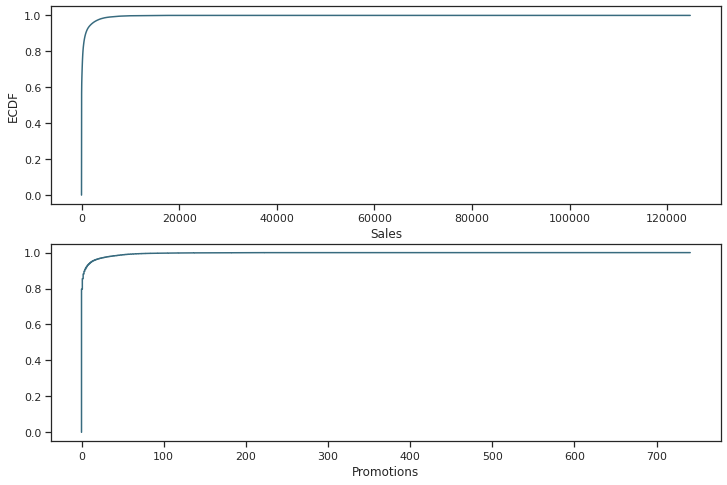

In [12]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 8))

plt.subplot(211)
cdf = ECDF(train['sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales')
plt.ylabel('ECDF')

# plot second ECDF  
plt.subplot(212)
cdf = ECDF(train['onpromotion'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Promotions')



In [13]:
store_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [14]:
store_data.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

## Let us ejoin store data with stores by number

In [15]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations 
# that are present in both train and store sets are merged together
train_store = pd.merge(train, store_data, how = 'inner', on = 'store_nbr')

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (3000888, 13)


,id,store_nbr,family,sales,onpromotion,Year,Month,Day,WeekOfYear,city,state,type,cluster
0,0,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Quito,Pichincha,D,13
1,1,1,BABY CARE,0.0,0,2013,1,1,1,Quito,Pichincha,D,13
2,2,1,BEAUTY,0.0,0,2013,1,1,1,Quito,Pichincha,D,13
3,3,1,BEVERAGES,0.0,0,2013,1,1,1,Quito,Pichincha,D,13
4,4,1,BOOKS,0.0,0,2013,1,1,1,Quito,Pichincha,D,13


## Plot a Barplot on Sales and Family columns

<AxesSubplot:xlabel='sales', ylabel='family'>

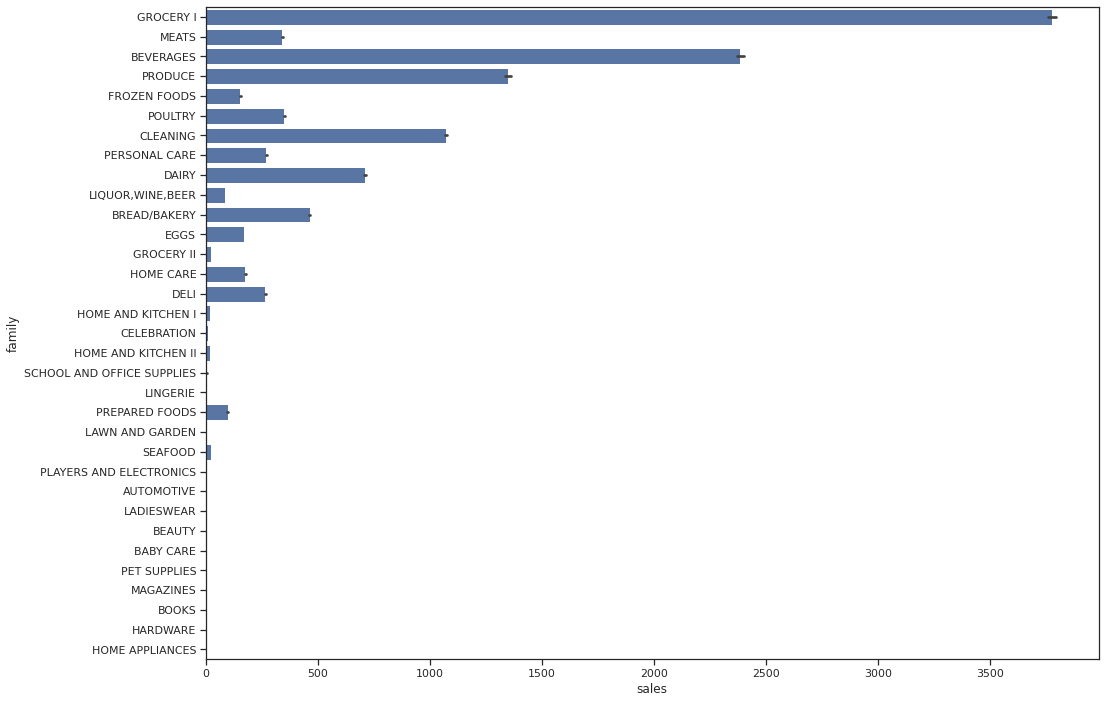

In [16]:
plt.figure(figsize=(16,12))
sns.barplot(x="sales", y="family", data=train_store.sort_values(by=['sales','family'], ascending=False),
            label="Sales", color="b")

## Plot a Seaborn Relplot 

<Figure size 1728x1296 with 0 Axes>

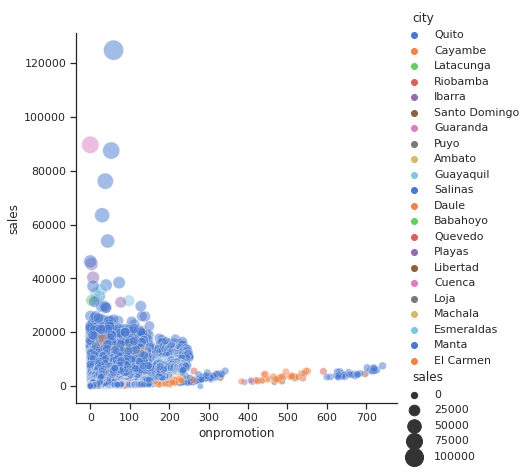

In [17]:
plt.figure(figsize=(24,18))
sns.relplot(x="onpromotion", y="sales", hue="city", size="sales",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=train_store)

## Some EDA on Holidays

<AxesSubplot:title={'center':'Counts of type of holiday'}, xlabel='locale', ylabel='count'>

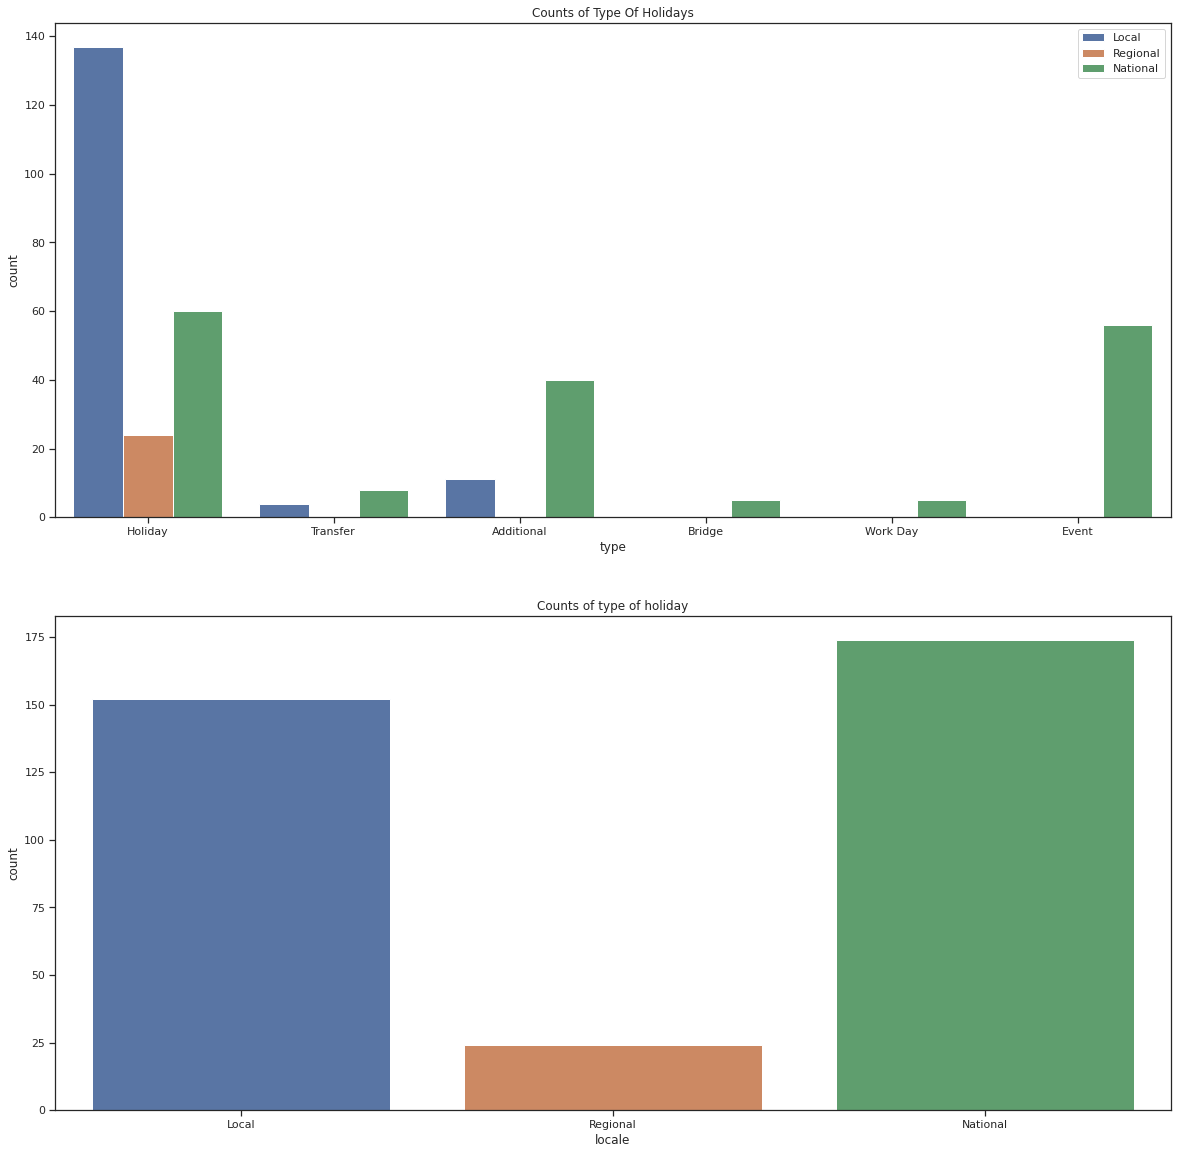

In [18]:
plt.subplots(1,2,figsize=(20,20))
plt.subplot(211)
plt.title('Counts of Type Of Holidays')
sns.countplot(x=holidays_data.type, hue=holidays_data.locale)
plt.legend(loc='upper right')
plt.subplot(212)
plt.title('Counts of type of holiday')
sns.countplot(x=holidays_data.locale)

### Plot a relplot on City , Sales and Family with a hue on State

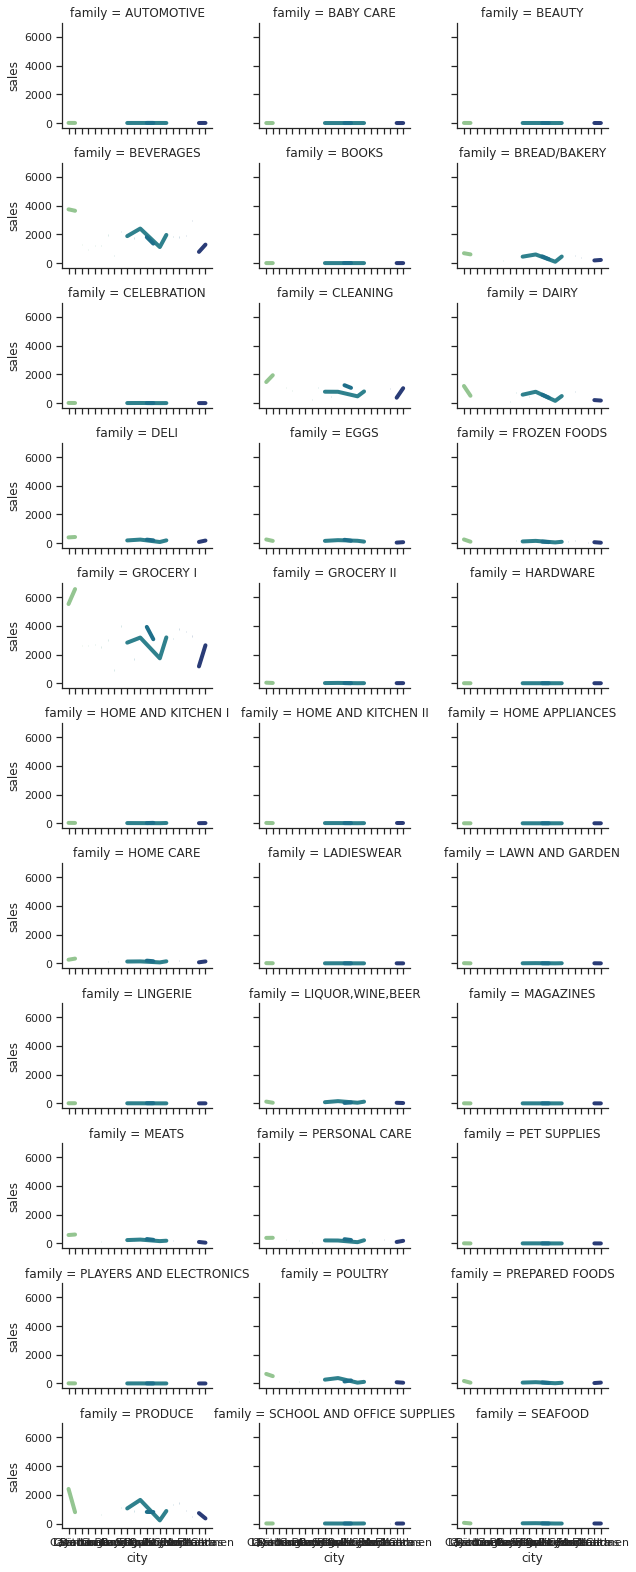

In [19]:
g = sns.relplot(
    data=train_store,
    x="city", y="sales", col="family", hue="state",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

## Some Store Data EDA

<AxesSubplot:xlabel='count', ylabel='city'>

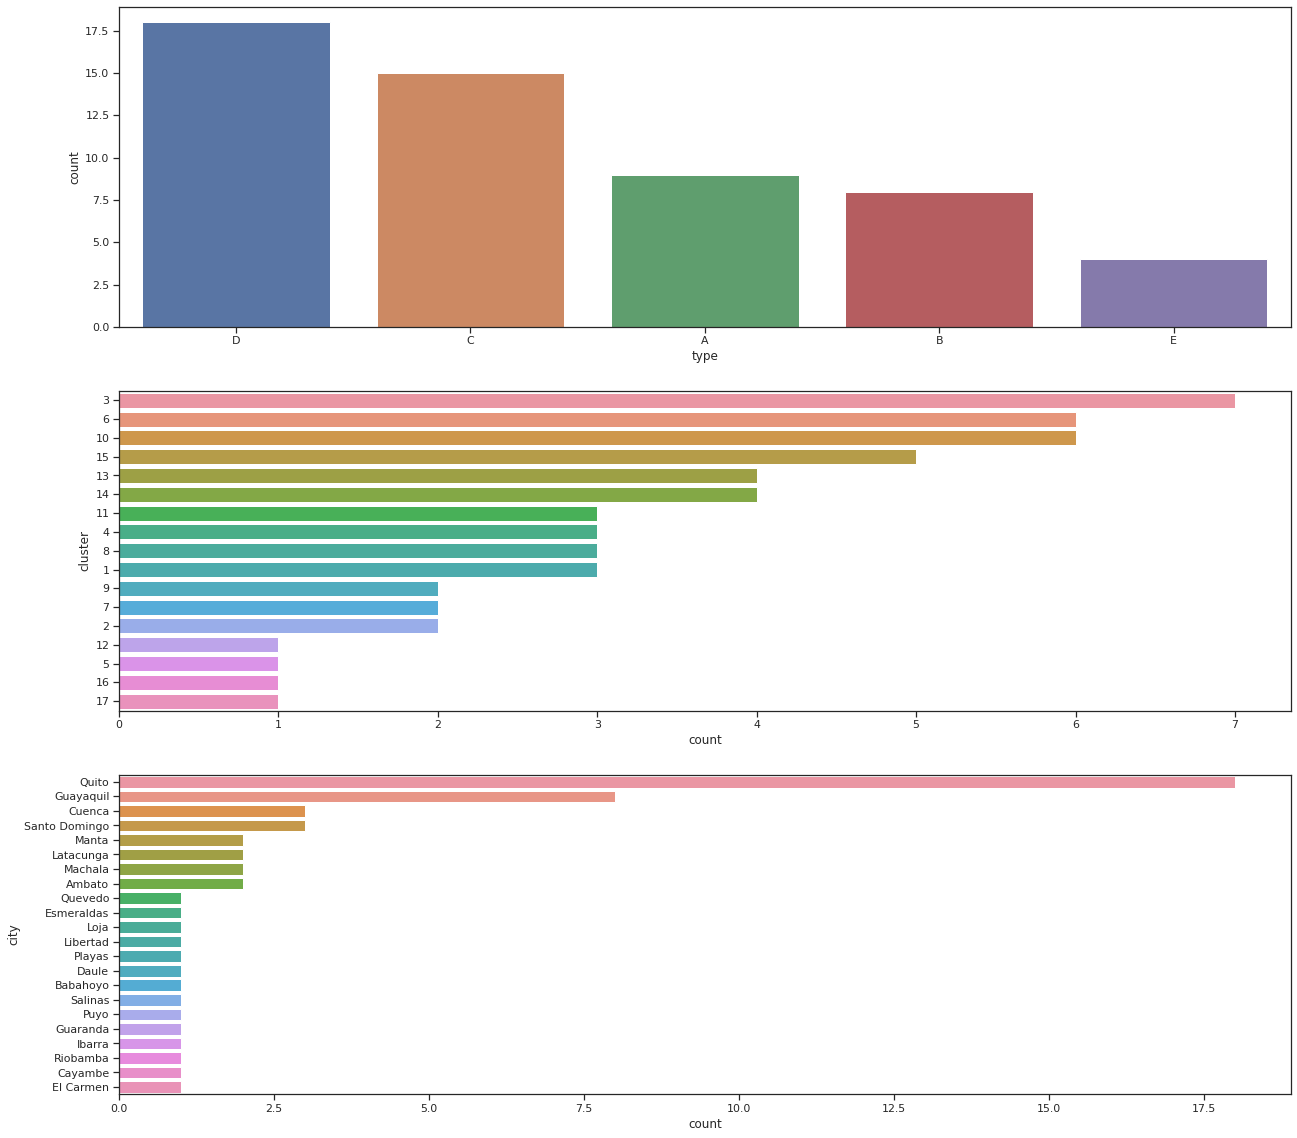

In [20]:
plt.subplots(1,3,figsize=(21,20))
plt.subplot(311)
sns.countplot(x=store_data.type, order = store_data.type.value_counts().index)
plt.subplot(312)
sns.countplot(y=store_data.cluster, order = store_data.cluster.value_counts().index)
plt.subplot(313)
sns.countplot(y=store_data.city, order = store_data.city.value_counts().index)

### Plot a factorplot on yearly sales by cluster and type of store

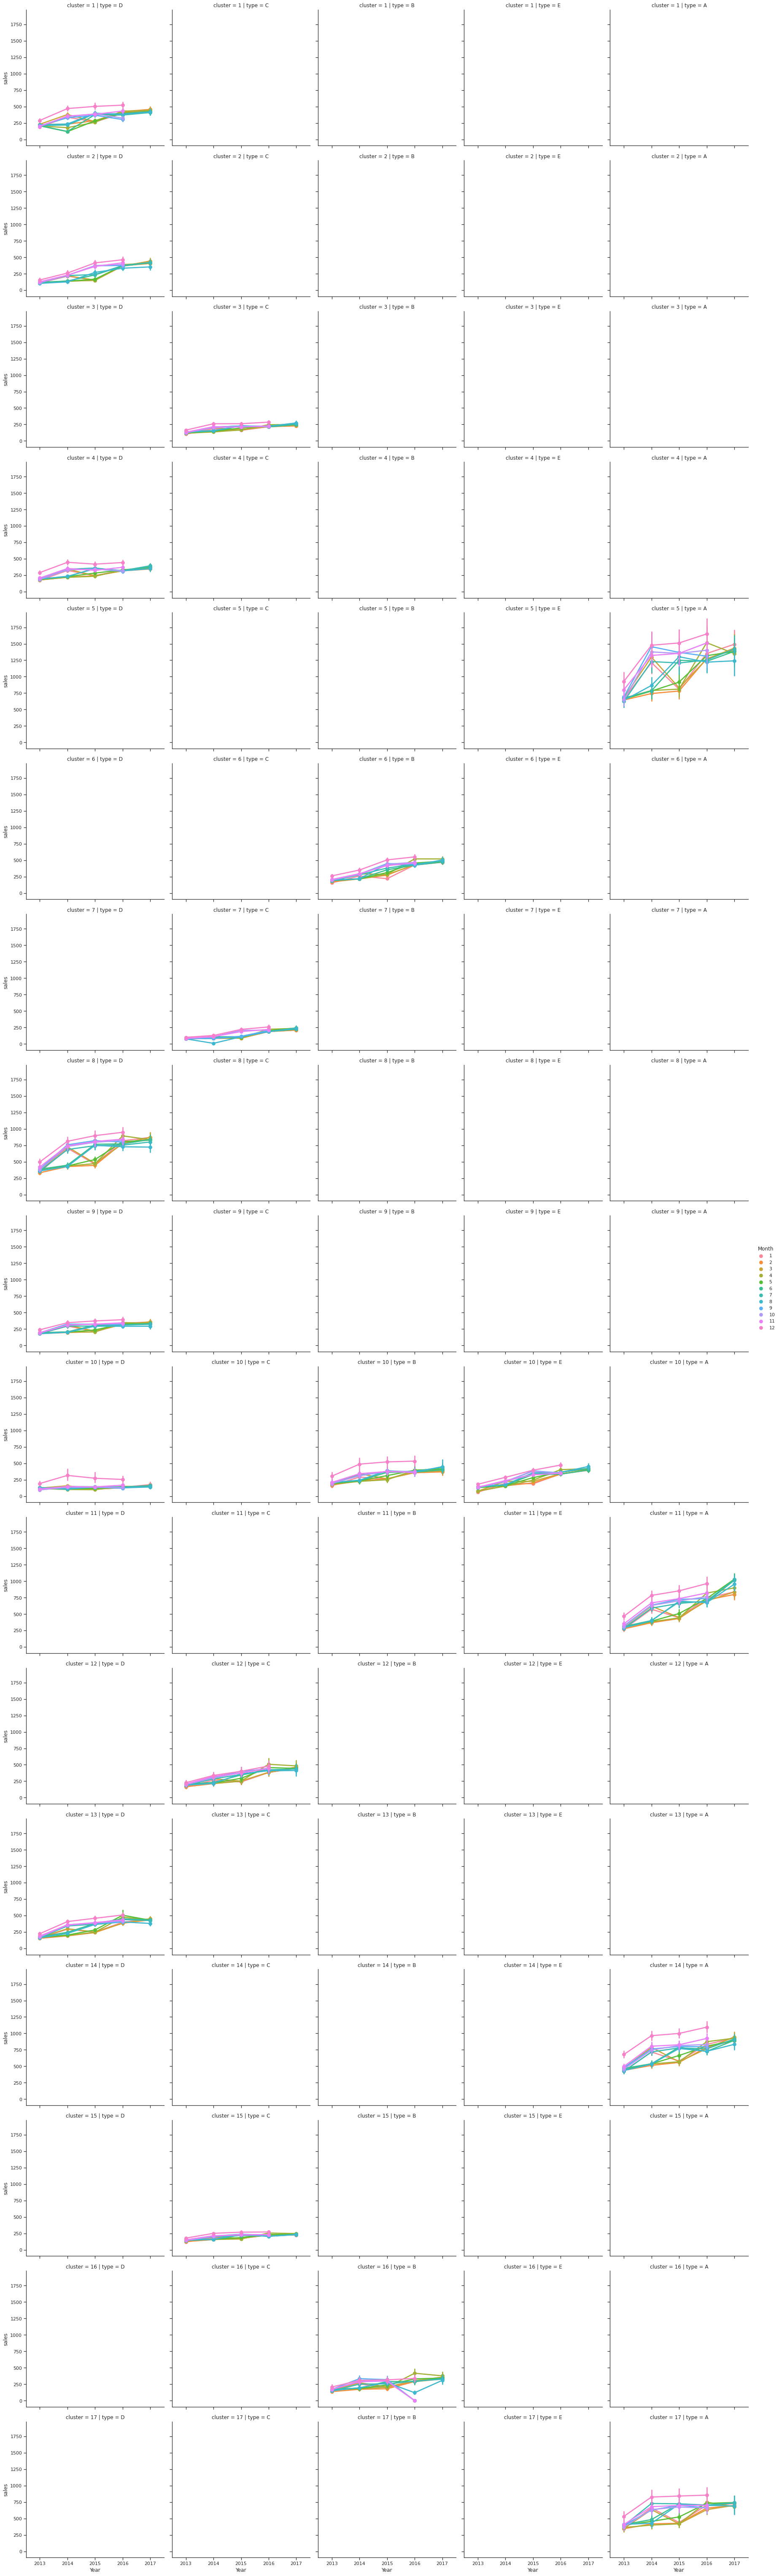

In [21]:
sns.factorplot(data = train_store, x ="Year", y = "sales", 
               col = 'type', # per store type in cols
               hue = 'Month',
               row = "cluster")

### Plot a Category Plot on Type and Cluster - Use Strip Plot

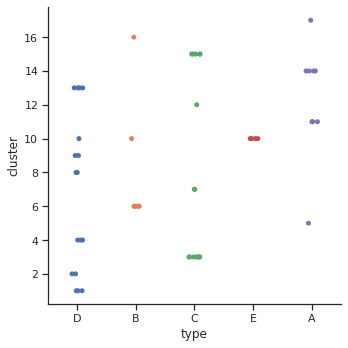

In [22]:
sns.catplot(x = 'type', y='cluster',data=store_data, kind='strip')

### Plot a Category Plot on Type and Cluster - Use Swarm  Plot

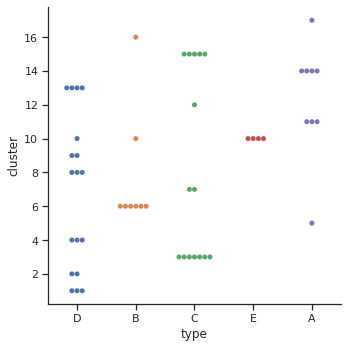

In [23]:
sns.catplot(x = 'type', y='cluster',data=store_data, kind='swarm')

In [24]:

train_store.groupby('state')['city','type','sales'].sum()


,sales
state,
Azuay,4.916860e+07
Bolivar,1.304951e+07
Chimborazo,1.138792e+07
Cotopaxi,2.118226e+07
El Oro,3.338680e+07
Esmeraldas,1.639169e+07
Guayas,1.651544e+08
Imbabura,1.145127e+07
Loja,1.886000e+07


In [25]:
train_store.groupby('city')['state','type','sales'].sum()

,sales
city,
Ambato,4.030440e+07
Babahoyo,1.774687e+07
Cayambe,2.832556e+07
Cuenca,4.916860e+07
Daule,1.918802e+07
El Carmen,1.105748e+07
Esmeraldas,1.639169e+07
Guaranda,1.304951e+07
Guayaquil,1.229673e+08


### Plot Barchart on Store Sales by Store and Sales Value

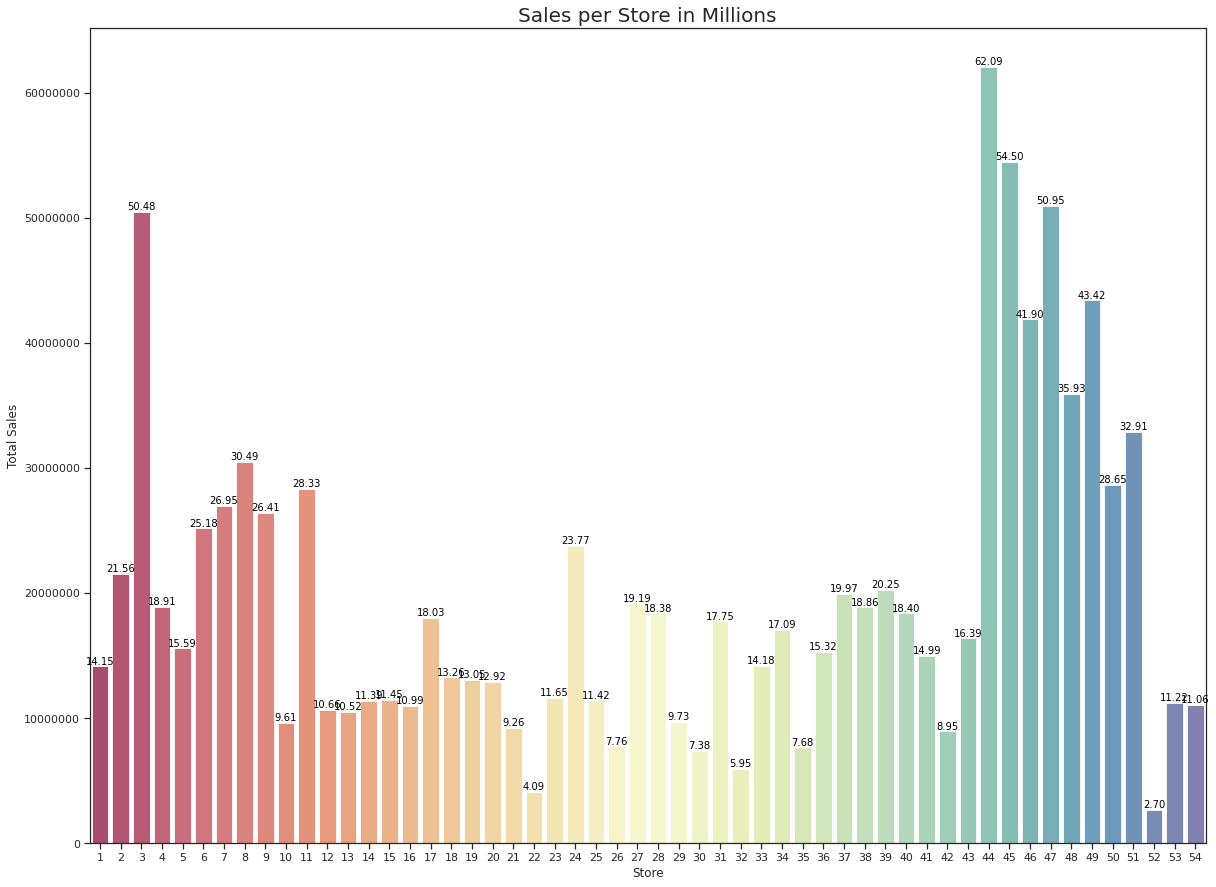

In [26]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
x=train_store.groupby('store_nbr')['city','type','sales'].sum()
x=x.sort_values(by='sales',ascending=False)
x=x.iloc[0:55].reset_index()

plt.figure(figsize=(20,15))
ax= sns.barplot( x.store_nbr ,x.sales, alpha=0.8,  palette="Spectral")
# annotation here
for p in ax.patches:
    ax.annotate("%.2f" % round((p.get_height()/1000000),2), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.ticklabel_format(style='plain', axis='y')
plt.title("Sales per Store in Millions", fontsize=20)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Store', fontsize=12)
plt.show()


### Plot Barchart on Store Sales by City and Sales Value

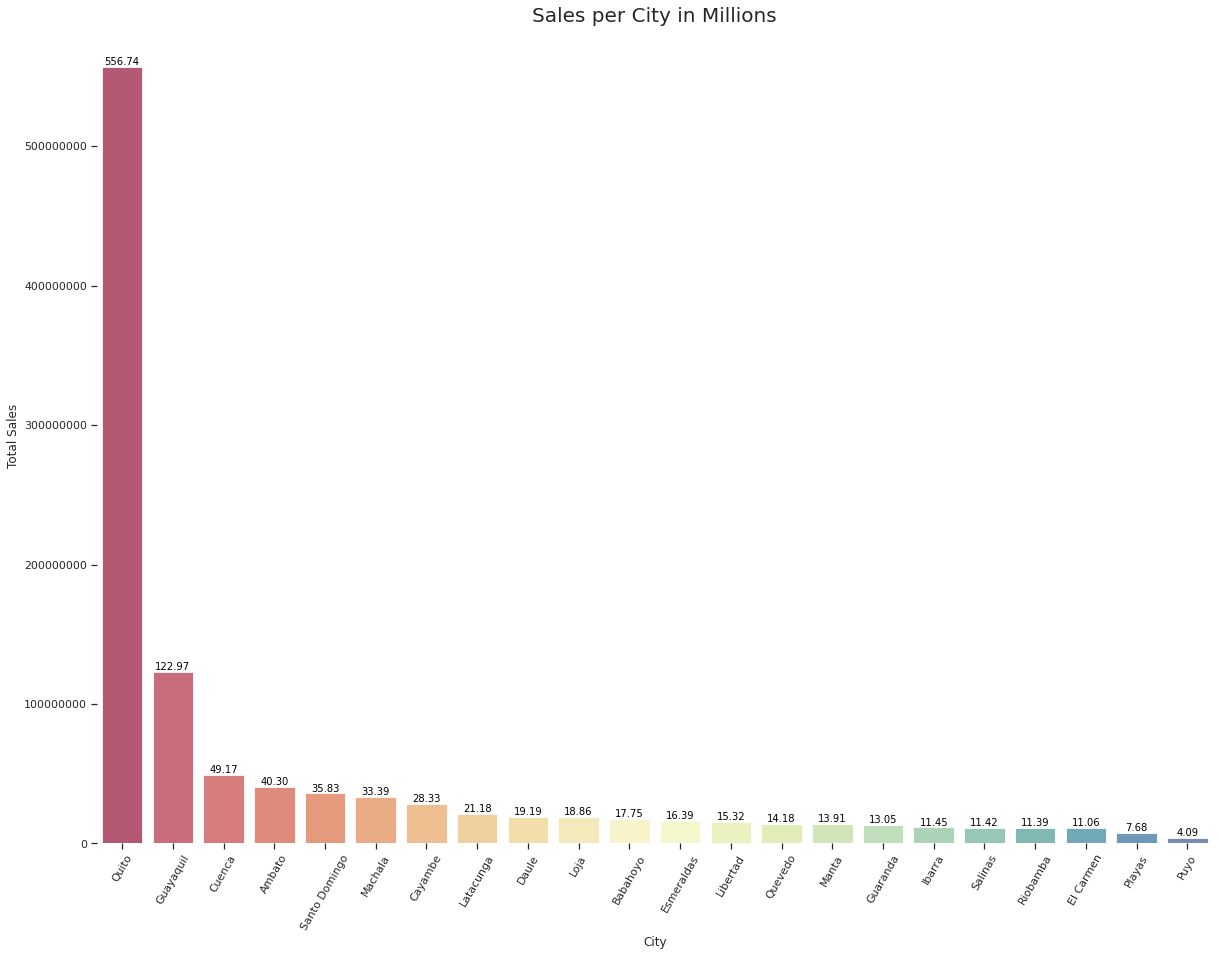

In [27]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
x=train_store.groupby('city')['store_nbr','type','sales'].sum()
x=x.sort_values(by='sales',ascending=False)
x=x.iloc[0:55].reset_index()

plt.figure(figsize=(20,15))
ax= sns.barplot( x.city ,x.sales, alpha=0.8,  palette="Spectral")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
# annotation here
for p in ax.patches:
    ax.annotate("%.2f" % round((p.get_height()/1000000),2), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.ticklabel_format(style='plain', axis='y')
plt.title("Sales per City in Millions", fontsize=20)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('City', fontsize=12)
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=60)
sns.despine(left=True, bottom=True)
plt.show()


### Plot Barchart on Store Sales by State and Sales Value

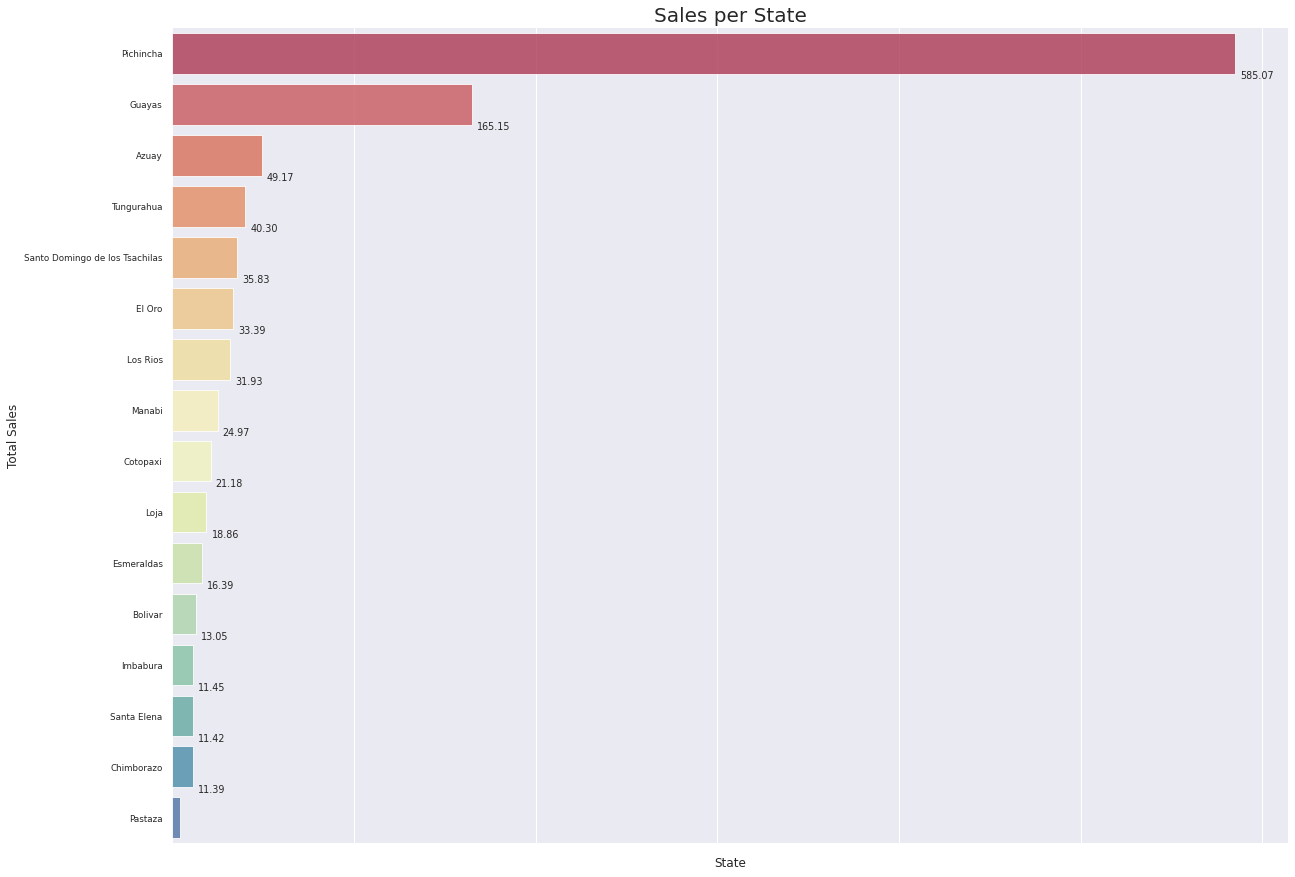

In [28]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
sns.set(font_scale=0.8)
x=train_store.groupby('state')['store_nbr','type','sales'].sum()
x=x.sort_values(by='sales',ascending=False)
x=x.iloc[0:55].reset_index()

plt.figure(figsize=(20,15))
ax= sns.barplot( x.sales ,x.state, alpha=0.8,  palette="Spectral")

for p in ax.patches:
    ax.annotate("%.2f" % round((p.get_width()/1000000),2), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 15), textcoords='offset points')

sns.set(font_scale=0.8)
plt.title("Sales per State", fontsize=20)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('State', fontsize=12)
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=60)
sns.despine(left=True, bottom=True)
sns.set_style('whitegrid')
plt.show()

### Build Submission Sample Data

In [29]:
# importing data
train = pd.read_csv(path+'train.csv', parse_dates = True, low_memory = False, index_col = 'date')
test = pd.read_csv(path+'test.csv')
submission_sample = pd.read_csv(path+'sample_submission.csv')


In [30]:
train.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [31]:
train=train.reset_index()
# sales for the store number 1 (StoreType C)
sales = train[train.store_nbr == 44].loc[:, ['date', 'sales']]

sales = sales.sort_index(ascending = False)

# to datetime64
sales['date'] = pd.DatetimeIndex(sales['date'])
sales.dtypes

# from the prophet documentation every variables should have specific names
sales = sales.rename(columns = {'date': 'ds',
                                'sales': 'y'})
sales.head()


,ds,y
3000392,2017-08-15,80.240
3000391,2017-08-15,345.000
3000390,2017-08-15,7239.617
3000389,2017-08-15,329.522
3000388,2017-08-15,909.194


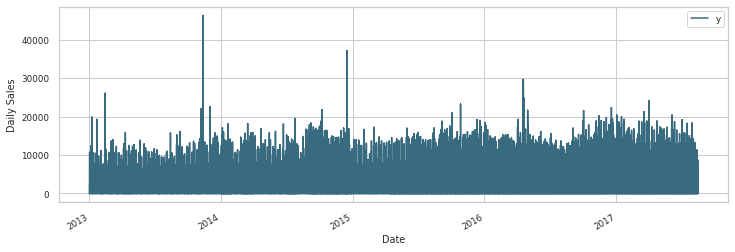

In [32]:

# plot daily sales
ax = sales.set_index('ds').plot(figsize = (12, 4), color = c)
ax.set_ylabel('Daily Sales')
ax.set_xlabel('Date')
plt.show()

In [33]:
holidays_data.groupby(['type','locale']).head(100)
print(holidays_data.type.unique())
print(holidays_data.locale.unique())

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']
['Local' 'Regional' 'National']


In [34]:
# create holidays dataframe
state_dates = holidays_data[((holidays_data.locale == 'National') |
                             (holidays_data.locale == 'Regional') &
                             (holidays_data.type == 'Holiday'))].loc[:, 'date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
holidays = state      
holidays.head()

,holiday,ds
0,state_holiday,2012-04-01
1,state_holiday,2012-06-25
2,state_holiday,2012-08-10
3,state_holiday,2012-10-09
4,state_holiday,2012-10-12


In [35]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width = 0.95, 
                   holidays = holidays)
my_model.fit(sales)

# dataframe that extends into future 52 weeks 
future_dates = my_model.make_future_dataframe(periods = 52*7)

print("First week to forecast.")
future_dates.tail(7)

Initial log joint probability = -111.453
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        130970    0.00399387       1604.89           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        130976    0.00021559       342.138           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        130977     0.0029507       187.645           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        130979   0.000120248       136.157           1           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     436        130979   6.12736e-06       150.331   2.357e-08       0.001      575  LS failed, Hessian reset 
     499        130979     0.0027751    

,ds
2041,2018-08-08
2042,2018-08-09
2043,2018-08-10
2044,2018-08-11
2045,2018-08-12
2046,2018-08-13
2047,2018-08-14


In [36]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


,ds,yhat,yhat_lower,yhat_upper
2041,2018-08-08,1353.805363,-3837.573847,6831.379332
2042,2018-08-09,1076.258071,-4334.796565,6206.590719
2043,2018-08-10,1278.912314,-3529.059139,6611.322657
2044,2018-08-11,1699.253671,-3467.998043,7061.968979
2045,2018-08-12,1782.761527,-4110.466168,7282.938285
2046,2018-08-13,1262.264827,-4336.392665,6242.360353
2047,2018-08-14,1177.189896,-4458.894622,6094.573198


In [37]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

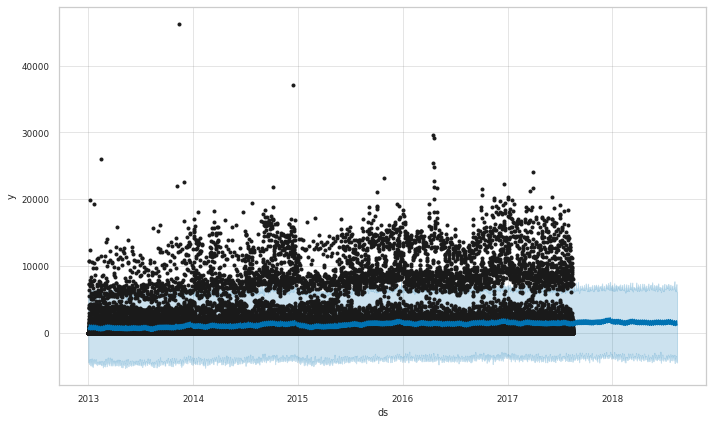

In [38]:
# visualizing predicions
my_model.plot(forecast);

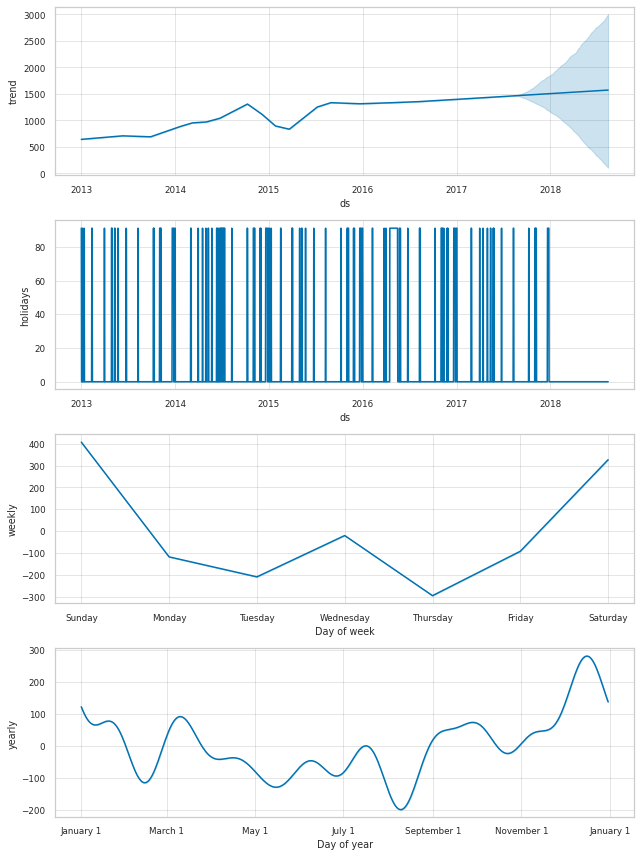

In [39]:
my_model.plot_components(forecast);

### Trying FastAI Tabular Libraries

###### Thanks to the inspiration https://www.kaggle.com/alibaba19/fastai-training-inference-pipeline/notebook 

In [40]:
from fastai.tabular.all import *
from sklearn.metrics import mean_squared_log_error

In [41]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train))

In [42]:
tab_pd = TabularPandas(train, 
                       procs = [Categorify, FillMissing, Normalize],
                       cat_names=['store_nbr', 'family'],
                       cont_names =['onpromotion'],
                       y_names = 'sales',
                       splits = splits)

In [43]:
dls = tab_pd.dataloaders(bs=1024)

In [44]:
dls.show_batch()

,store_nbr,family,onpromotion,sales
0,44,PET SUPPLIES,6.849484e-08,38.000000
1,49,PET SUPPLIES,1.000000e+00,31.000000
2,47,"LIQUOR,WINE,BEER",6.849484e-08,174.000000
3,41,SEAFOOD,2.000000e+00,8.000000
4,39,FROZEN FOODS,4.000000e+00,89.869003
5,5,DAIRY,2.000000e+00,496.000000
6,40,PRODUCE,1.060000e+02,1868.552002
7,34,CELEBRATION,6.849484e-08,10.000000
8,5,BREAD/BAKERY,6.849484e-08,415.225006
9,29,SCHOOL AND OFFICE SUPPLIES,6.849484e-08,6.000000


In [45]:
train.sales.max()

124717.0

In [46]:
def rmsle(inp, targ):
    inp = inp.detach().cpu().numpy()
    targ = targ.detach().cpu().numpy()
    return np.sqrt(mean_squared_log_error(targ, inp))

In [47]:
learner = tabular_learner(dls, metrics=rmsle, y_range=(0, 125000))

In [48]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,rmsle,time
0,212542.375000,210441.546875,2.369612,01:00


In [49]:
test = pd.read_csv(path+'test.csv')

In [50]:
dl = learner.dls.test_dl(test)

In [51]:
preds = learner.get_preds(dl=dl)
preds[0].shape

torch.Size([28512, 1])

In [52]:
submission_sample = pd.read_csv(path+'sample_submission.csv')

In [53]:
submission_sample.sales = preds[0].detach().cpu().numpy()
submission_sample.head(3)

,id,sales
0,3000888,46.562328
1,3000889,54.235851
2,3000890,73.777954


In [54]:
submission_sample.to_csv('submission.csv', index=False)

<hr>
<h1> Conclusion</h1>
<hr>
<h2> Summary </h2>
<p> I hope you liked the outcome </p>